In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [44]:
data = pd.read_csv('/content/drive/MyDrive/Truth seek/Features_For_Traditional_ML_Techniques.csv')
data.head()

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19


In [45]:
data = data.drop(columns=['Unnamed: 0','majority_target','statement','embeddings'])

In [46]:
data.columns

Index(['BinaryNumTarget', 'tweet', 'followers_count', 'friends_count',
       'favourites_count', 'statuses_count', 'listed_count', 'following',
       'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions',
       'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs',
       'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage',
       'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage',
       'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage',
       'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage',
       'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage',
       'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage',
       'LANGUAGE_percentage', 'Word count', 'Max word length',
       'Min word length', 'Average word length', 'present_verbs', 'past_verbs',
       'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs',
       'determiners', 'conjunctions', 'dots', 'exclamation', 'questions',

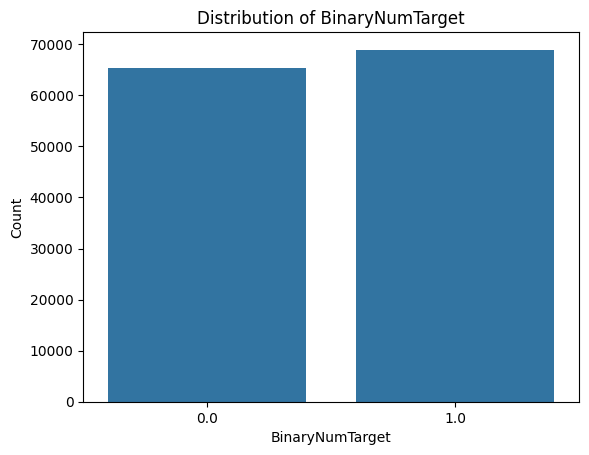

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
sns.countplot(x='BinaryNumTarget', data=data)
plt.xlabel('BinaryNumTarget')
plt.ylabel('Count')
plt.title('Distribution of BinaryNumTarget')
plt.show()


In [48]:
# Select numeric columns for heatmap
numeric_columns = ['followers_count', 'friends_count', 'favourites_count', 'statuses_count',
                   'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred',
                   'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets',
                   'favourites', 'hashtags', 'unique_count', 'total_count', 'ORG_percentage',
                   'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage',
                   'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage',
                   'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
                   'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage',
                   'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length',
                   'Min word length', 'Average word length', 'present_verbs', 'past_verbs',
                   'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners',
                   'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals',
                   'digits', 'long_word_freq', 'short_word_freq']

numeric_data = data[numeric_columns]

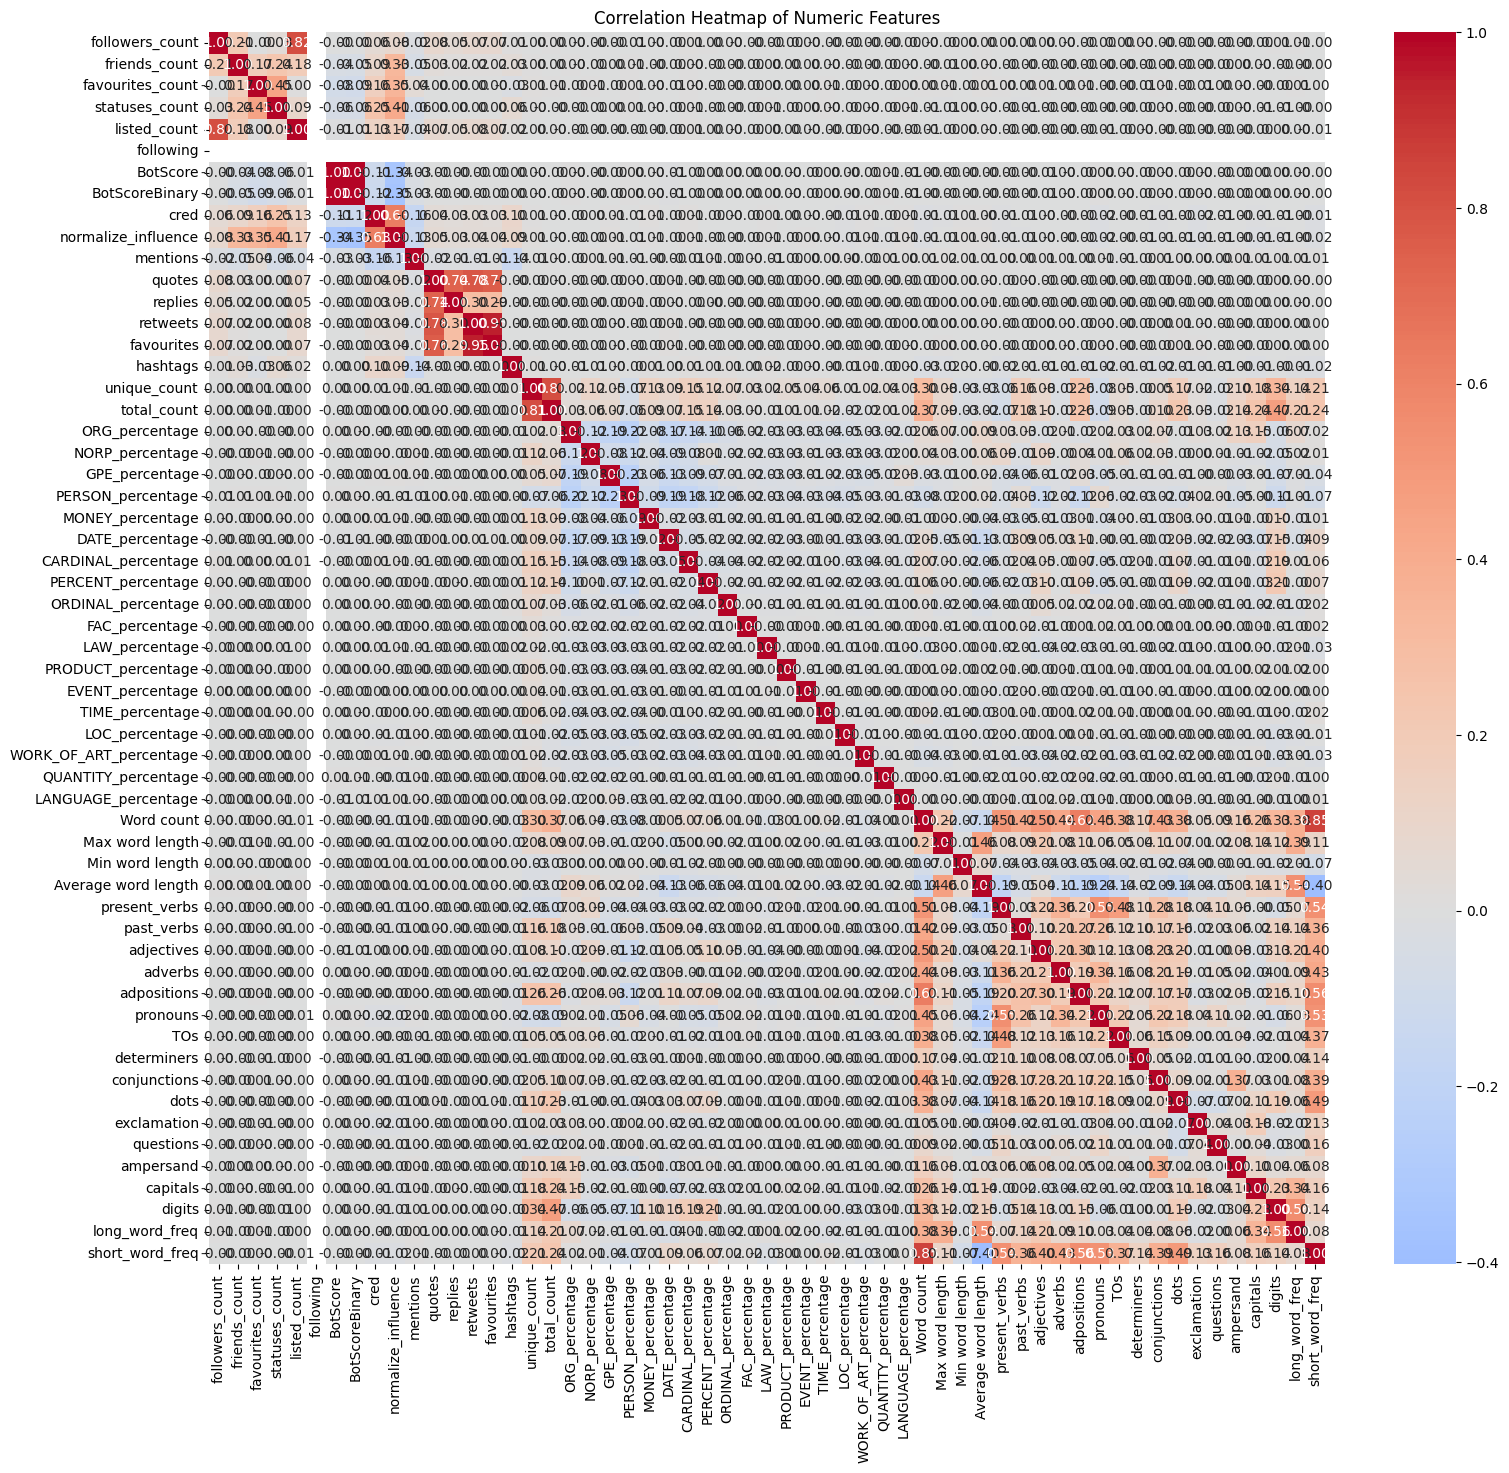

In [49]:
# Calculate correlation matrix
corr_matrix = numeric_data.corr()
# Plot heatmap
plt.figure(figsize=(18, 16))  # Adjust figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [50]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr().abs()

In [51]:
# Create a mask to ignore self-correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [52]:
# Apply the mask to the correlation matrix
masked_corr_matrix = corr_matrix.mask(mask)

In [53]:
# Find columns with correlations above the threshold (0.8 in this case)
threshold = 0.7
highly_corr_features = [column for column in masked_corr_matrix.columns if any(masked_corr_matrix[column] > threshold)]


In [54]:
# Drop the highly correlated features from the dataset
reduced_data = numeric_data.drop(columns=highly_corr_features)

In [55]:
# Print the remaining columns
print(reduced_data.columns)

Index(['friends_count', 'favourites_count', 'statuses_count', 'listed_count',
       'following', 'BotScoreBinary', 'cred', 'normalize_influence',
       'mentions', 'replies', 'favourites', 'hashtags', 'total_count',
       'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Max word length', 'Min word length', 'Average word length',
       'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions',
       'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation',
       'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq',
       'short_word_freq'],
      dtype='object')


In [56]:
# Add the 'tweet' column to the reduced dataset
final_data = pd.concat([data['tweet'], data['BinaryNumTarget'],reduced_data], axis=1)

In [57]:
final_data.columns

Index(['tweet', 'BinaryNumTarget', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'BotScoreBinary', 'cred',
       'normalize_influence', 'mentions', 'replies', 'favourites', 'hashtags',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Max word length', 'Min word length', 'Average word length',
       'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions',
       'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation',
       'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq',
       'short_word_freq'],
      dtype='obje

In [58]:
important_features = [
    'tweet', 'BinaryNumTarget',
    'friends_count', 'followers_count', 'statuses_count', 'listed_count',
    'BotScoreBinary', 'cred', 'mentions', 'replies', 'retweets', 'favourites',
    'hashtags', 'total_count', 'ORG_percentage', 'PERSON_percentage', 'DATE_percentage',
    'MONEY_percentage', 'Word count', 'Average word length', 'present_verbs',
    'past_verbs', 'adjectives', 'adverbs', 'exclamation', 'questions', 'capitals', 'digits'
]

In [59]:
# Selecting these features from the data
selected_data = data[important_features]

In [60]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [61]:
max_words = 1000  # Max number of words to keep in Tokenizer
max_seq_length = 100  # Max sequence length for padding

In [62]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(selected_data['tweet'])
sequences = tokenizer.texts_to_sequences(selected_data['tweet'])
word_index = tokenizer.word_index

In [63]:
# Pad sequences to have consistent length
tweet_data = pad_sequences(sequences, maxlen=max_seq_length)

In [64]:
# Convert other numerical features to numpy arrays
numerical_features = selected_data.drop(['tweet', 'BinaryNumTarget'], axis=1).values

In [65]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

In [66]:
# Target variable
target = selected_data['BinaryNumTarget'].values

In [67]:
# Train-test split
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    tweet_data, numerical_features, target, test_size=0.2, random_state=42
)

In [68]:
# RNN Model Architecture
text_input = Input(shape=(max_seq_length,))
embedding_layer = Embedding(max_words, 100)(text_input)
lstm_layer = LSTM(64, kernel_regularizer=l2(0.01))(embedding_layer)
lstm_layer = Dropout(0.5)(lstm_layer)

In [69]:
numeric_input = Input(shape=(X_train_num.shape[1],))
numeric_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(numeric_input)
numeric_layer = BatchNormalization()(numeric_layer)
numeric_layer = Dropout(0.5)(numeric_layer)

In [70]:
concat_layer = concatenate([lstm_layer, numeric_layer])
dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concat_layer)
dense_layer = BatchNormalization()(dense_layer)
dense_layer = Dropout(0.5)(dense_layer)

In [71]:
output_layer = Dense(1, activation='sigmoid')(dense_layer)

In [72]:
model = Model(inputs=[text_input, numeric_input], outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# Model Training
callbacks = [EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)]
history = model.fit([X_train_text, X_train_num], y_train, epochs=20, batch_size=32,
                    validation_split=0.2, callbacks=callbacks)

Epoch 1/20
2684/2684 [==============================] - 45s 15ms/step - loss: 0.9044 - accuracy: 0.5947 - val_loss: 0.6712 - val_accuracy: 0.6183
Epoch 2/20
2684/2684 [==============================] - 30s 11ms/step - loss: 0.6718 - accuracy: 0.6196 - val_loss: 0.7200 - val_accuracy: 0.5700
Epoch 3/20
2684/2684 [==============================] - 35s 13ms/step - loss: 0.3045 - accuracy: 0.8996 - val_loss: 0.2719 - val_accuracy: 0.9151
Epoch 4/20
2684/2684 [==============================] - 30s 11ms/step - loss: 0.2430 - accuracy: 0.9224 - val_loss: 0.2233 - val_accuracy: 0.9257
Epoch 5/20
2684/2684 [==============================] - 30s 11ms/step - loss: 0.2240 - accuracy: 0.9257 - val_loss: 0.2091 - val_accuracy: 0.9286
Epoch 6/20
2684/2684 [==============================] - 32s 12ms/step - loss: 0.2128 - accuracy: 0.9295 - val_loss: 0.2283 - val_accuracy: 0.9210
Epoch 7/20
2684/2684 [==============================] - 30s 11ms/step - loss: 0.2082 - accuracy: 0.9314 - val_loss: 0.2111 -

In [74]:
# Print the validation accuracy for each epoch
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy for each epoch:")
for epoch, accuracy in enumerate(val_accuracy, 1):
    print(f"Epoch {epoch}: {accuracy:.4f}")

Validation Accuracy for each epoch:
Epoch 1: 0.6183
Epoch 2: 0.5700
Epoch 3: 0.9151
Epoch 4: 0.9257
Epoch 5: 0.9286
Epoch 6: 0.9210
Epoch 7: 0.9281
Epoch 8: 0.9184


In [75]:
# Print the final validation accuracy
final_val_accuracy = val_accuracy[-1]
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

Final Validation Accuracy: 0.9184


In [76]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test_text, X_test_num], y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

839/839 [==============================] - 4s 4ms/step - loss: 0.2039 - accuracy: 0.9319
Test Accuracy: 93.19%


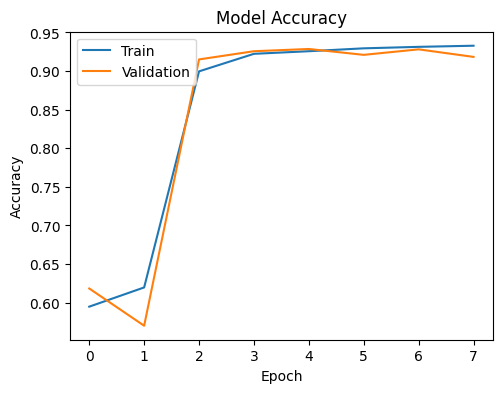

In [77]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

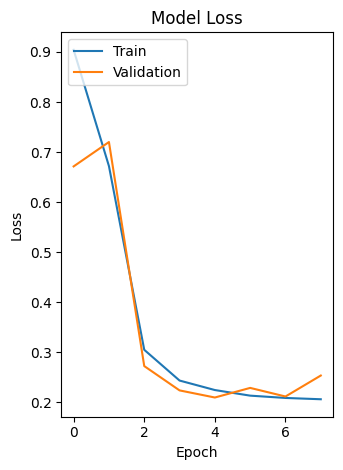

In [78]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [79]:
# Get predictions
y_pred_prob = model.predict([X_test_text, X_test_num])
y_pred = (y_pred_prob > 0.5).astype(int)

839/839 [==============================] - 4s 4ms/step


In [80]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[11879  1197]
 [  632 13132]]


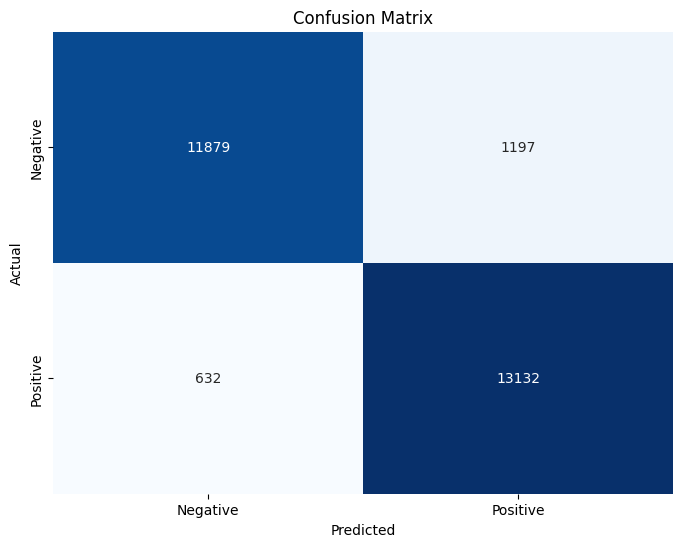

In [81]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [83]:
# Save the model to a file
model.save('Project_verity_function(3.1).h5')
